# Predict the stock price using Lasso Regression

In [107]:
# Import libraries

import yfinance as yf

In [3]:
# Download the Data from Yahoo Finance

tickers = ['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC']
df = yf.download(tickers, start = '2020-01-01', end = '2025-04-01')['Close']
df.head()


C:\Users\sahil\AppData\Local\Temp\ipykernel_668\909351943.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start = '2020-01-01', end = '2025-04-01')['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.538528,94.900497,152.791138,208.848923,3257.850098
2020-01-03,71.833267,93.748497,150.888596,206.935898,3234.850098
2020-01-06,72.405670,95.143997,151.278625,208.269226,3246.280029
2020-01-07,72.065140,95.343002,149.899307,208.240295,3237.179932
2020-01-08,73.224403,94.598503,152.286957,209.805435,3253.050049


In [4]:
# Feature Engineering

df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['AMZN(t-1)'] = df['AMZN'].shift(1)
df['MSFT(t-1)'] = df['MSFT'].shift(1)
df['QQQ(t-1)'] = df['QQQ'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)

In [5]:
df['AAPL(MA_5)'] = df['AAPL'].rolling(window=5).mean()
df['AMZN(MA_5)'] = df['AMZN'].rolling(window=5).mean()
df['MSFT(MA_5)'] = df['MSFT'].rolling(window=5).mean()
df['QQQ(MA_5)'] = df['QQQ'].rolling(window=5).mean()
df['^GSPC(MA_5)'] = df['^GSPC'].rolling(window=5).mean()


In [6]:
df['Target'] = df['AAPL'].shift(-1)
df.head()

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL(MA_5),AMZN(MA_5),MSFT(MA_5),QQQ(MA_5),^GSPC(MA_5),Target
Date,,,,,,,,,,,,,,,,
2020-01-02,72.538528,94.900497,152.791138,208.848923,3257.850098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.833267
2020-01-03,71.833267,93.748497,150.888596,206.935898,3234.850098,72.538528,94.900497,152.791138,208.848923,3257.850098,NaN,NaN,NaN,NaN,NaN,72.405670
2020-01-06,72.405670,95.143997,151.278625,208.269226,3246.280029,71.833267,93.748497,150.888596,206.935898,3234.850098,NaN,NaN,NaN,NaN,NaN,72.065140
2020-01-07,72.065140,95.343002,149.899307,208.240295,3237.179932,72.405670,95.143997,151.278625,208.269226,3246.280029,NaN,NaN,NaN,NaN,NaN,73.224403
2020-01-08,73.224403,94.598503,152.286957,209.805435,3253.050049,72.065140,95.343002,149.899307,208.240295,3237.179932,72.413402,94.746899,151.428925,208.419955,3245.842041,74.779747


In [7]:
df = df.dropna()

In [8]:
# Step for Lasso Regression

# 1. Import libraries
# 2. Define features and Target variables
# 3. Train Test split data
# 4. Apply Lasso Regression
# 5. Get Intercept & co-eff for Lasso Regression
# 6. Predict using Lasso Regression
# 7. Create a dataframe with Actual and Predicted values
# 8. Plot the graph between Actual and Predicted Prices
# 9. Evaluate the model - R Square, Mse, RMSE

In [9]:
# 1. Import libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [10]:
# 2. Define features and Target variables

X = df[ ['AAPL(t-1)', 'AMZN(t-1)',
       'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL(MA_5)', 'AMZN(MA_5)',
       'MSFT(MA_5)', 'QQQ(MA_5)', '^GSPC(MA_5)' ] ]

Y = df['Target']

In [40]:
# 3. Train Test split data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.05, shuffle = False)

In [92]:
# 4. Apply Lasso Regression

lasso = Lasso(alpha = 5)
lasso.fit(X_train, Y_train)

Lasso(alpha=5)

In [94]:
# 5. Get Intercept & co-eff for Lasso Regression

co_eff = lasso.coef_
co_eff

intercept = lasso.intercept_
intercept

coeff_df = pd.DataFrame( { 'Feature': X.columns, 'co-eff': co_eff} )
coeff_df

,Feature,co-eff
0,AAPL(t-1),0.585999
1,AMZN(t-1),-0.000000
2,MSFT(t-1),0.008888
3,QQQ(t-1),0.000000
4,^GSPC(t-1),0.001209
5,AAPL(MA_5),0.373269
6,AMZN(MA_5),-0.000000
7,MSFT(MA_5),0.000000
8,QQQ(MA_5),0.000000
9,^GSPC(MA_5),0.000000


In [96]:
# 6. Predict using Lasso Regression

y_pred = lasso.predict(X_test)
y_pred

array([249.1265135 , 252.25895389, 253.10587387, 255.74865984,
       256.64517918, 254.32424964, 251.85629347, 249.68937618,
       244.64641771, 243.70405423, 243.99811693, 241.66600386,
       241.46189765, 237.21951618, 234.91259709, 233.93039925,
       235.75987711, 229.60680891, 229.84739928, 224.91730613,
       224.7564522 , 224.29315934, 223.72581658, 228.83042712,
       235.06941751, 236.67061491, 236.41735105, 235.3148594 ,
       230.15094707, 232.50060675, 232.01949471, 231.88387281,
       228.48828305, 228.72248578, 231.97007545, 235.05121757,
       239.14726649, 242.17532446, 243.04038016, 244.00443486,
       244.85219974, 244.67830627, 245.70235808, 245.24352556,
       240.7205626 , 238.47745387, 240.60781741, 237.35123662,
       235.6941045 , 235.62422477, 235.01578935, 236.4230002 ,
       228.21939463, 222.89195941, 218.78324154, 212.47699664,
       213.92903608, 213.66521928, 212.6508662 , 214.58207804,
       214.24797512, 217.23161353, 219.63035683, 221.89

In [98]:
# 7. Create a dataframe with Actual and Predicted values

final = pd.DataFrame( {'Actual': Y_test, 'Predict' : y_pred } )
final

,Actual,Predict
Date,,
2024-12-20,254.367035,249.126514
2024-12-23,257.286652,252.258954
2024-12-24,258.103729,253.105874
2024-12-26,254.685883,255.748660
2024-12-27,251.307877,256.645179
...,...,...
2025-03-24,223.203659,217.231614
2025-03-25,220.989075,219.630357
2025-03-26,223.303421,221.893586


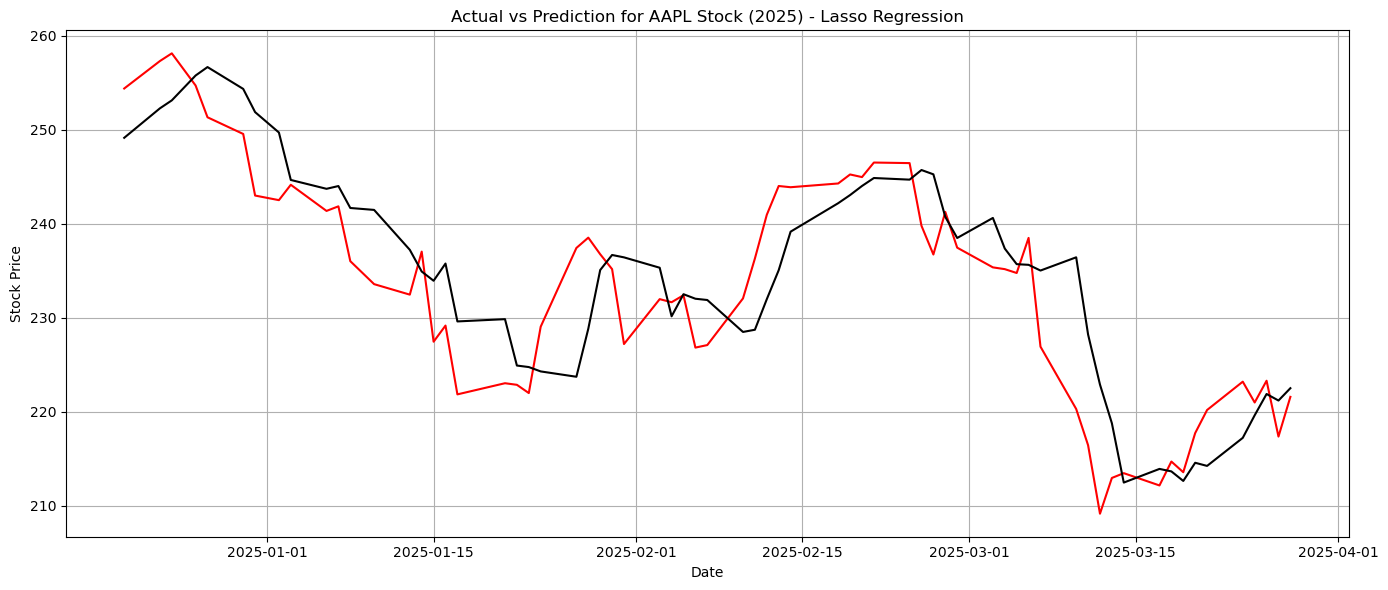

In [104]:
# 8. Plot the graph between Actual and Predicted Prices

import matplotlib.pyplot as plt

plt.figure(figsize = (14,6))
plt.plot(final.index, final['Actual'], label = 'Actual', color = 'red')
plt.plot(final.index, final['Predict'], label = 'Predicted', color = 'black')
plt.title('Actual vs Prediction for AAPL Stock (2025) - Lasso Regression')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [102]:
# 9. Evaluate the model - R Square, Mse, RMSE

r2 = r2_score(Y_test, y_pred)
print('R^2', r2)

mse = mean_squared_error(Y_test, y_pred)
print('MSE', mse)

RMSE = np.sqrt(mse)
print('RMSE', RMSE)

R^2 0.7561788861150982
MSE 34.320898526222734
RMSE 5.858404093797451
